In [1]:
import pandas as pd
import numpy as np
from rso import rso_clustering
import matplotlib.pyplot as plt

In [2]:
print("Loading data...")
tf_idf = pd.read_csv('data/tfidf.csv')
print("Done.")

tf_idf = np.array(tf_idf)

Loading data...
Done.


In [3]:
def euc_distance(mp, mj):
    return np.linalg.norm(mp-mj)

# can't use cos_distance: matrix too sparse
def cos_distance(mp, mj):
    return np.dot(mp, mj)/(np.linalg.norm(mp)*np.linalg.norm(mj))

# print(euc_distance(tf_idf[0], tf_idf[1]))
# print(cos_distance(tf_idf[0], tf_idf[1]))

In [4]:
RSO_ITERATIONS = 40
n = tf_idf.shape[0]

for k in [3,5,8,10,12]:
        population, best_rat, cluster_assignments, convergence = rso_clustering.rso_clustering(instances=tf_idf,
                agents=20,
                k=k,
                min_bound=np.zeros((k,n)),
                max_bound=np.ones((k,n)),
                distance=euc_distance,
                max_steps=RSO_ITERATIONS
        )

        with open("results/csv/rso/best_rat_k{}.csv".format(k), "a+") as f:
                f.write(str(k) + ";")
                np.savetxt(f, best_rat, delimiter=";")

        # with open("cluster_assignments.csv", "a+") as f:
        #     f.write(str(k) + ";")
        #     np.savetxt(f, cluster_assignments, delimiter=";")

        with open("results/csv/rso/convergence_k{}.csv".format(k), "a+") as f:
                for entry in convergence:
                        f.write(str(entry[0]) + ";" + str(entry[1]) + "\n")


 82%|████████▎ | 33/40 [10:55<02:16, 19.49s/it]

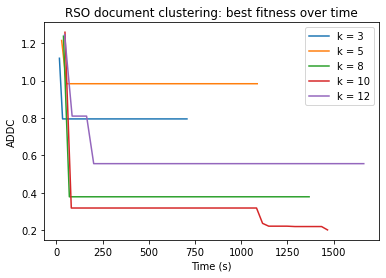

In [ ]:
legend = []
for k in [3,5,8,10,12]:
    with open("results/csv/rso/convergence_k{}.csv".format(k), "r") as f:
        lines = f.readlines()
    
    time = []
    fitness = []
    legend.append("k = {}".format(k))

    for step in lines:
        split_line = step.strip().split(";")
        time.append(float(split_line[0]))
        fitness.append(round(float(split_line[1]), 3))
        
    plt.plot(time, fitness)
        
plt.xlabel("Time (s)")
plt.ylabel("ADDC")
plt.title("RSO document clustering: best fitness over time")
plt.legend(legend)
plt.savefig("results/plots/k_tests_rso.png")
plt.show()